In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Datasets/cancer_tumor_data_features.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
breast_data = load_breast_cancer()

In [10]:
print(breast_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Priciple Components Analysis

In [11]:
#step1 Scale the data
from sklearn.preprocessing import StandardScaler

In [12]:
std_Sclar = StandardScaler()

In [13]:
std_Sclar.fit(df)

In [14]:
sclar_X = std_Sclar.transform(df)

In [15]:
sclar_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [17]:
# step2:- create covariance matrix from the sclar feature
covar_matrix = np.cov(sclar_X,rowvar=False)

In [19]:
covar_matrix[0]

array([ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151,
        0.50701464,  0.67795504,  0.82397664,  0.14800135, -0.31217947,
        0.68028597, -0.09748878,  0.67535854,  0.7371592 , -0.22299203,
        0.20636266,  0.19454553,  0.37683123, -0.10450454, -0.04271634,
        0.97124591,  0.29753054,  0.9668357 ,  0.94273929,  0.11982673,
        0.41419075,  0.52783912,  0.74552443,  0.16424199,  0.00707833])

In [20]:
#step3:- get the eigenValue and eigenVector form covar_matrix
eigen_value,eigen_vector = np.linalg.eig(covar_matrix)

In [21]:
eigen_value

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [24]:
eigen_vector[0]

array([ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635,
        0.01874079,  0.12408834,  0.0074523 , -0.22310976,  0.09548644,
        0.04147149,  0.05106746,  0.01196721, -0.05950613, -0.05111877,
        0.15058388, -0.20292425, -0.14671234, -0.22538466, -0.70241409,
        0.21146046, -0.21119401, -0.13152667,  0.1294764 ,  0.0192265 ,
       -0.18257944,  0.09855269, -0.0729289 , -0.04969866,  0.06857001])

In [25]:
#step4;-get the n component value for PCA
n_compt = 2

In [27]:
#step5:- Get index sorting key based on Eigen Values
sorted_key = np.argsort(eigen_value)[::-1][:n_compt]

In [28]:
sorted_key

array([0, 1], dtype=int64)

In [29]:
# step6:- Get num_components of Eigen Values and Eigen Vectors
eigen_values, eigen_vectors = eigen_value[sorted_key], eigen_vector[:, sorted_key]

In [31]:
# step7:- Dot product of original data and eigen_vectors are the principal component values
# This is the "projection" step of the original points on to the Principal Component
principal_components=np.dot(sclar_X,eigen_vectors)

In [32]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


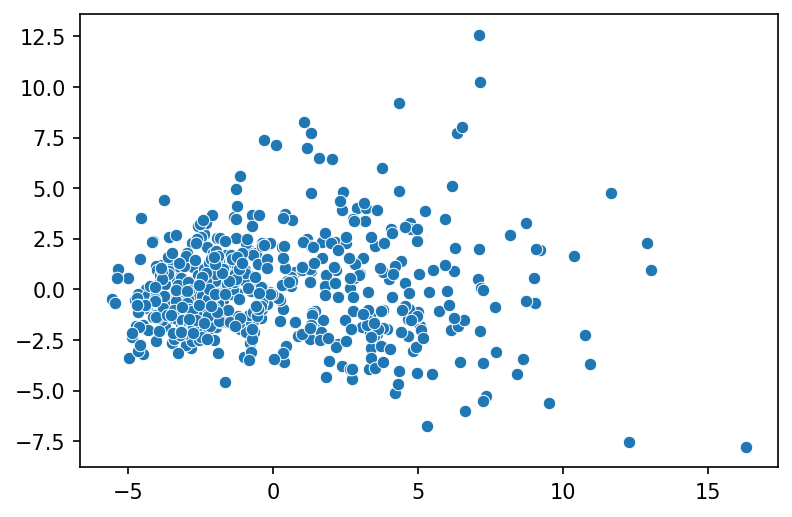

In [41]:
#plot the features
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(principal_components[:,0],principal_components[:,1])
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


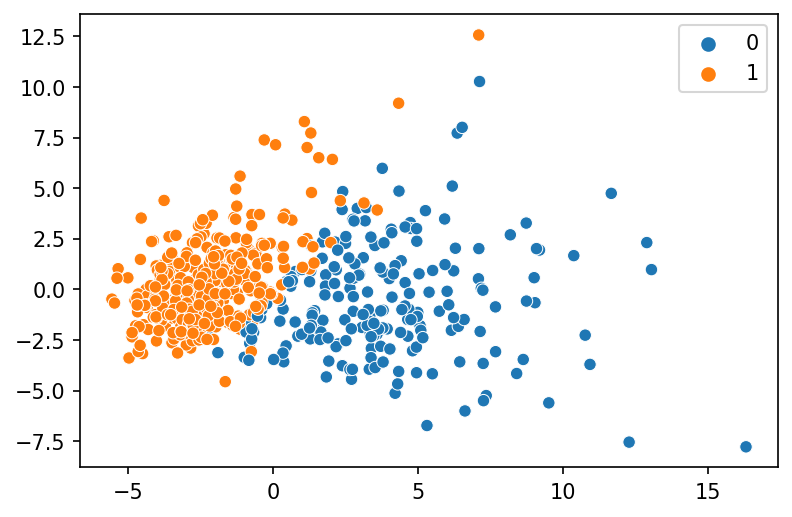

In [42]:
#plot the features
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(principal_components[:,0],principal_components[:,1],hue=breast_data.target)
plt.show()